In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt

sns.set(style = 'white')


import os
print(os.listdir("/content/drive/MyDrive/archive (1)"))


['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [3]:
telecom_cust = pd.read_csv('/content/drive/MyDrive/archive (1)/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set
#Removing missing values
telecom_cust.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

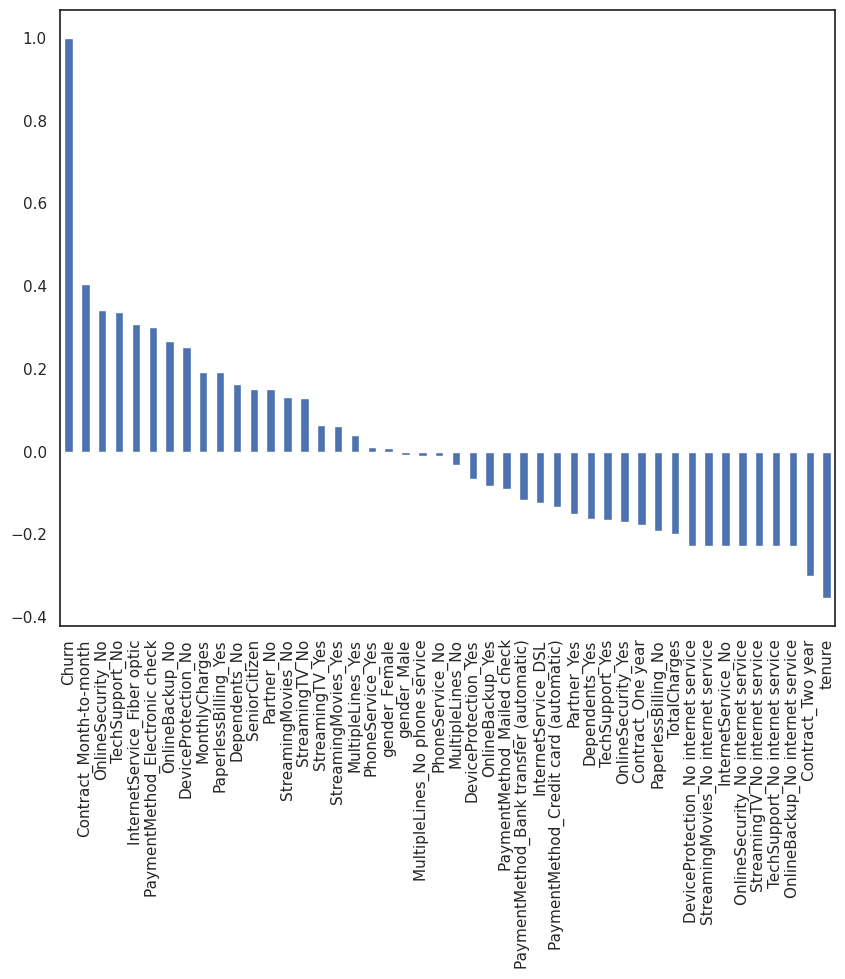

In [10]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(10,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Text(0.5, 1.0, 'Gender Distribution')

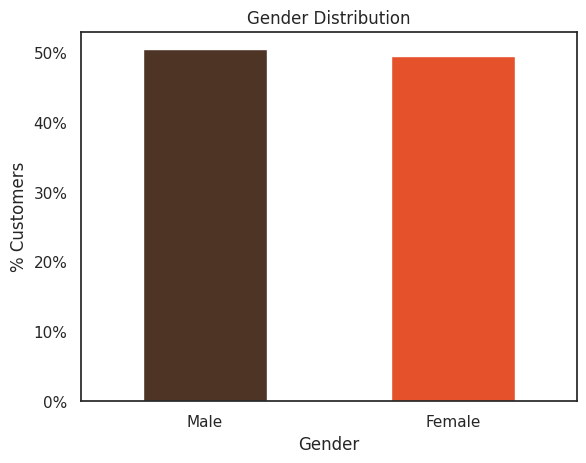

In [11]:
# Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.
# Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.
# We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

#Data Exploration
# Gender Distribution - About half of the customers in our data set are male while the other half are female
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True,  rot = 0,  color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', fontsize=12, color='white', weight = 'bold')


Text(0.5, 1.0, '% of Senior Citizens')

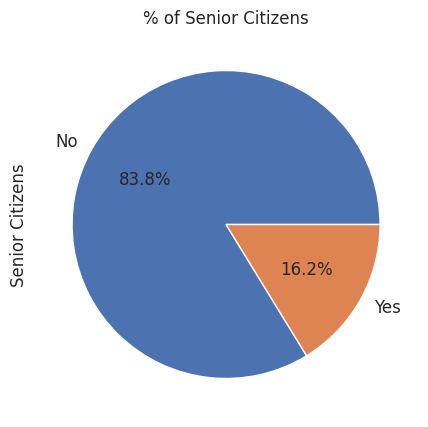

In [12]:
# % Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

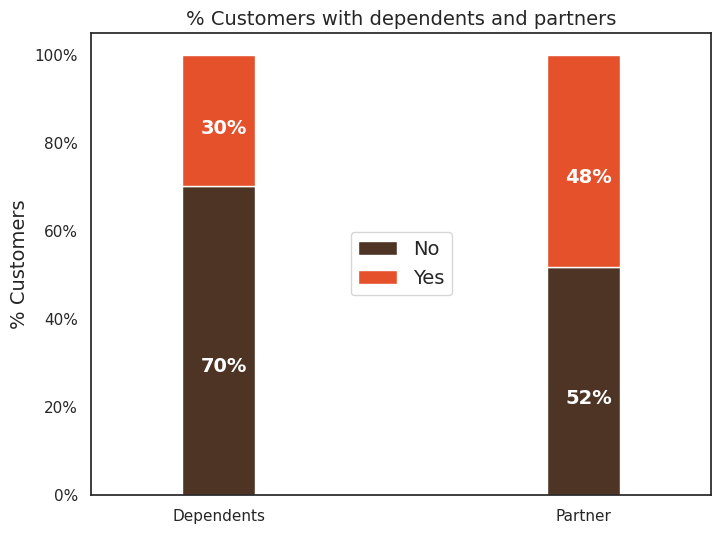

In [14]:
# Partner and dependent status - About 50% of the customers have a partner, while only 30% of the total customers have dependents.
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors, figsize=(8,6),rot = 0, width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),  color = 'white', weight = 'bold',  size = 14)

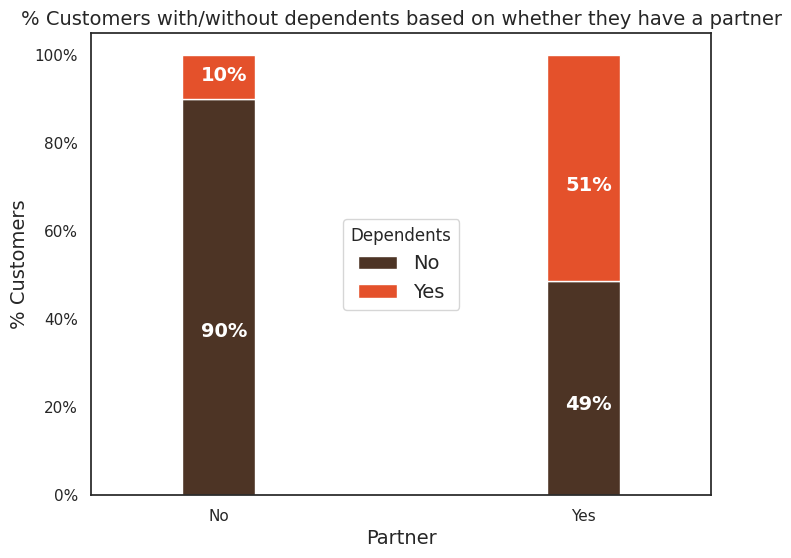

In [16]:
# What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0, figsize = (8,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

Text(0.5, 1.0, '# of Customers by their tenure')

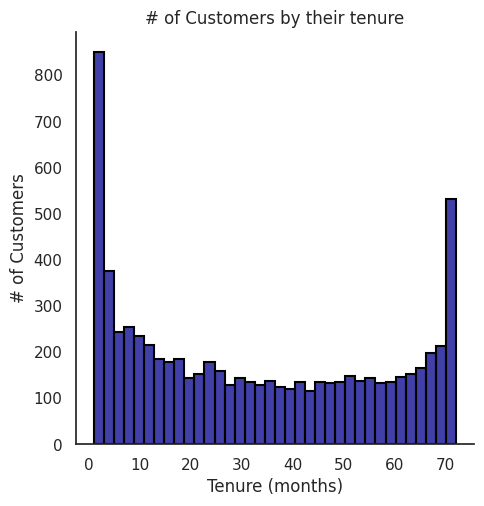

In [18]:
# B.) Customer Account Information:
# 1. Tenure: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months
# ax = sns.displot(telecom_cust['tenure'], hist=True, kde=False, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax = sns.displot(telecom_cust['tenure'], kde=False, bins=int(180/5), color='darkblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Tenure (months)')
plt.ylabel('# of Customers')

plt.title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

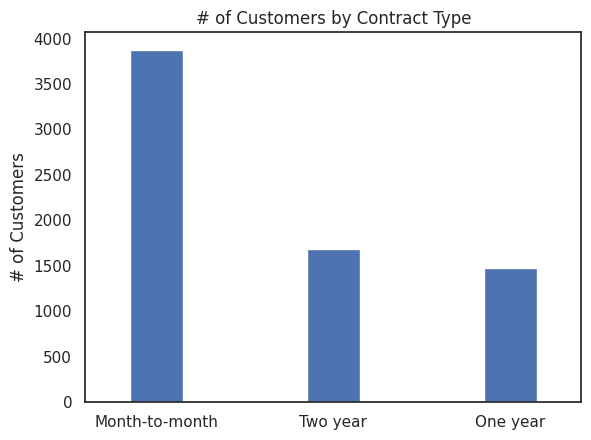

In [19]:
# 2. Contracts: To understand the above graph, lets first look at the # of customers by different contracts.
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
plt.ylabel('# of Customers')
plt.title('# of Customers by Contract Type')

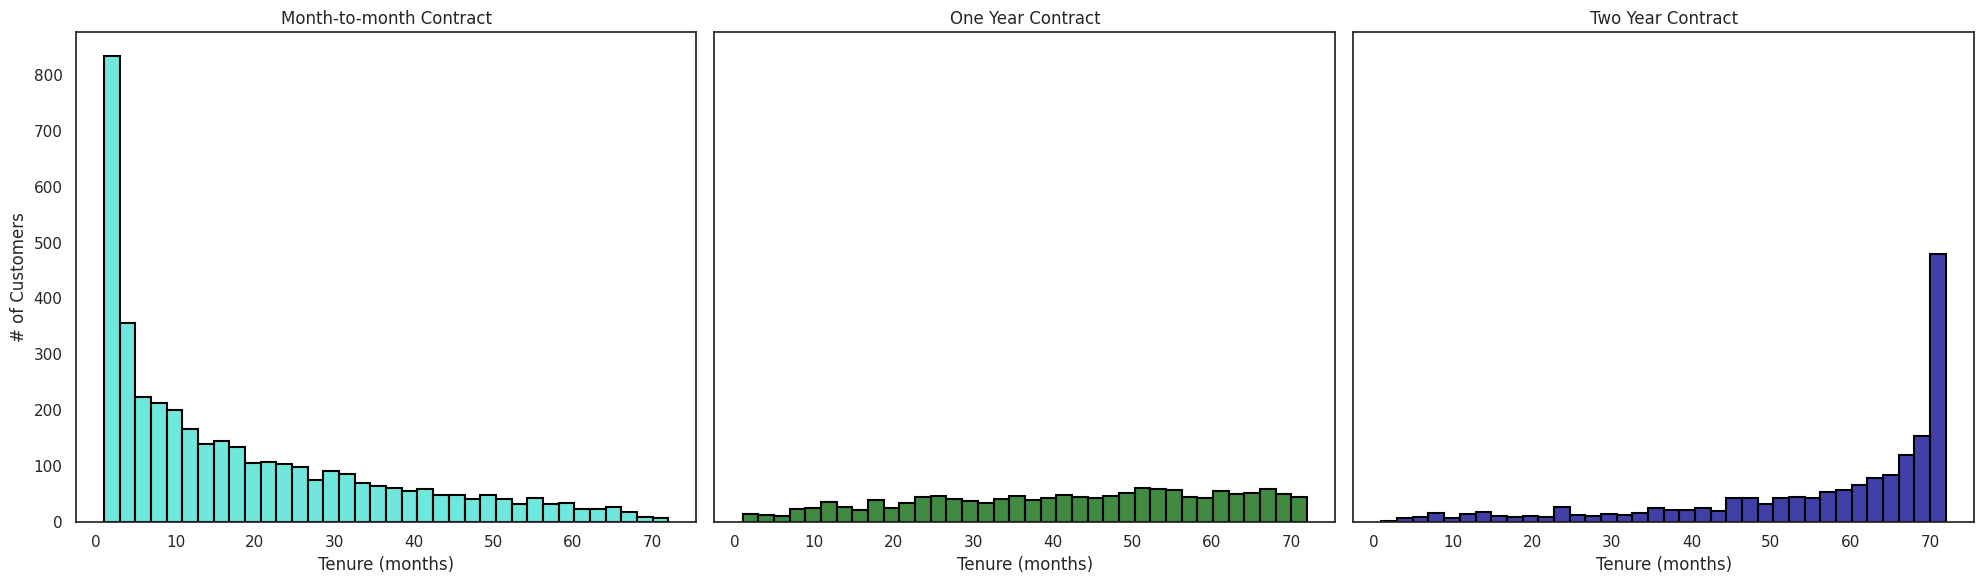

In [20]:
# #  understand the tenure of customers based on their contract type.

# Create a new figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plot the histogram for 'Month-to-month' contract
sns.histplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'], bins=int(180/5), color='turquoise', edgecolor='black', linewidth=1.5, ax=ax1)
ax1.set(xlabel='Tenure (months)', ylabel='# of Customers')
ax1.set_title('Month-to-month Contract')

# Plot the histogram for 'One year' contract
sns.histplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'], bins=int(180/5), color='darkgreen', edgecolor='black', linewidth=1.5, ax=ax2)
ax2.set(xlabel='Tenure (months)', ylabel='# of Customers')
ax2.set_title('One Year Contract')

# Plot the histogram for 'Two year' contract
sns.histplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'], bins=int(180/5), color='darkblue', edgecolor='black', linewidth=1.5, ax=ax3)
ax3.set(xlabel='Tenure (months)', ylabel='# of Customers')
ax3.set_title('Two Year Contract')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




In [21]:
# distribution of various services used by customers
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

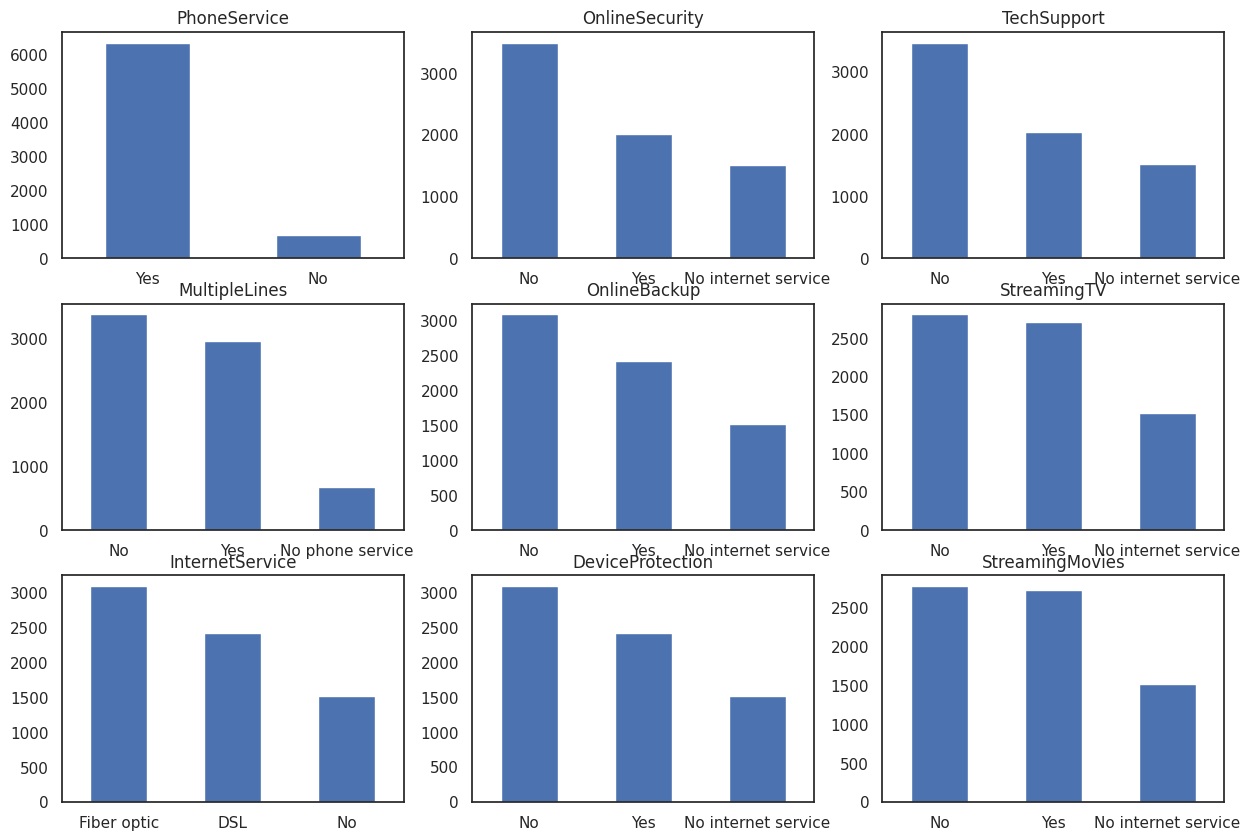

In [22]:
import matplotlib.pyplot as plt

services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0)

    elif 3 <= i < 6:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i - 3, 1], rot=0)

    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i - 6, 2], rot=0)

    ax.set_title(item)

# Display the plots
plt.show()



<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

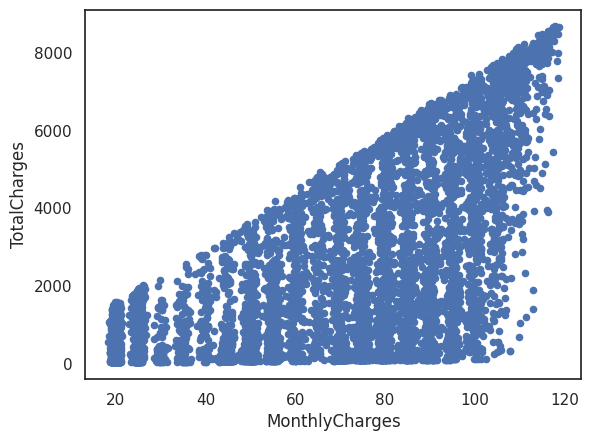

In [ ]:
# look at the relation between monthly and total charges
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')


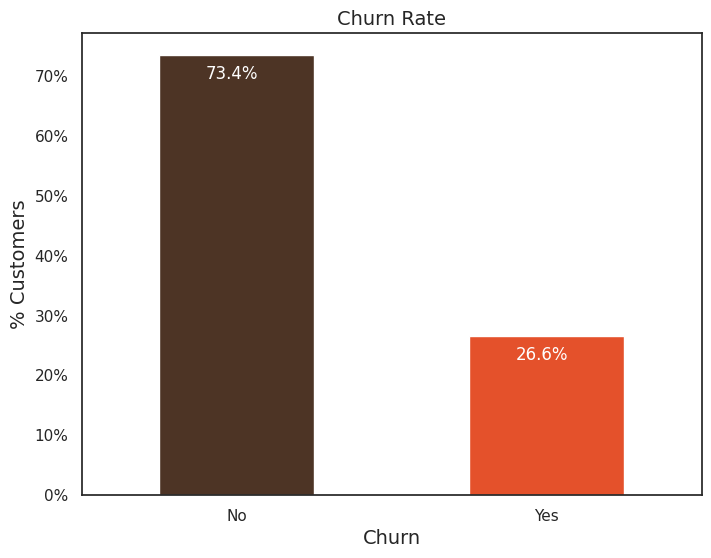

In [ ]:
# look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)


for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0, str(round((i.get_height() / total), 1)) + '%', size=12,  # or fontsize=12  color='white')


<Axes: xlabel='Churn', ylabel='tenure'>

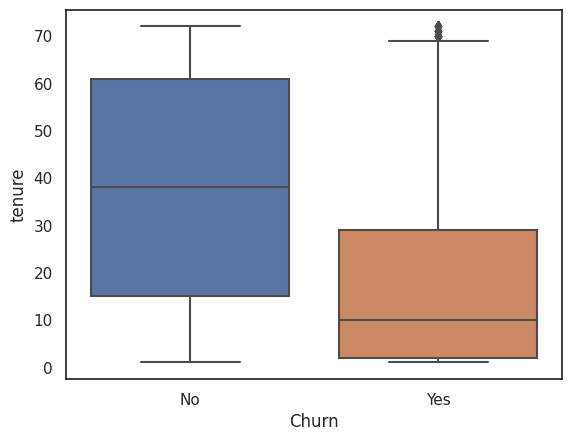

In [19]:
# explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.
# i.) Churn vs Tenure
sns.boxplot(data=telecom_cust, x = 'Churn', y = 'tenure')

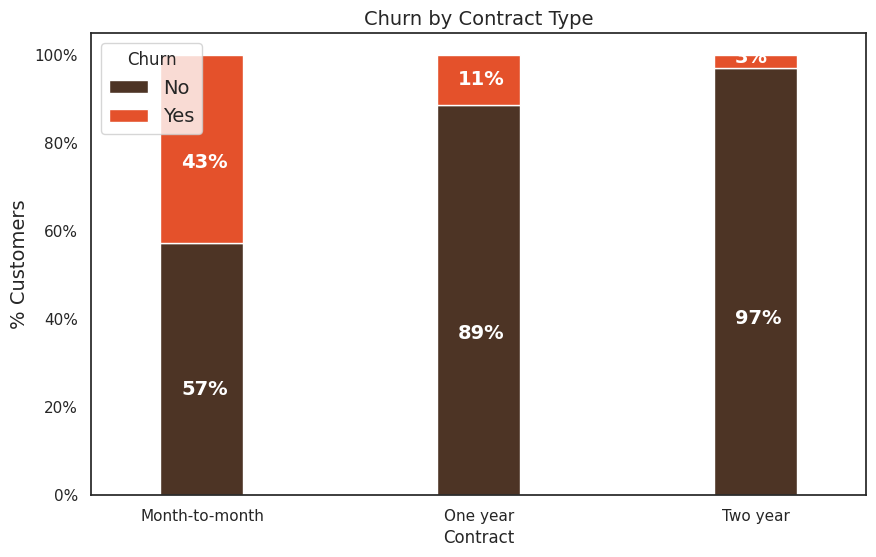

In [ ]:
# ii.) Churn by Contract Type
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',  width = 0.3,  stacked = True,  rot = 0,  figsize = (10,6),  color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

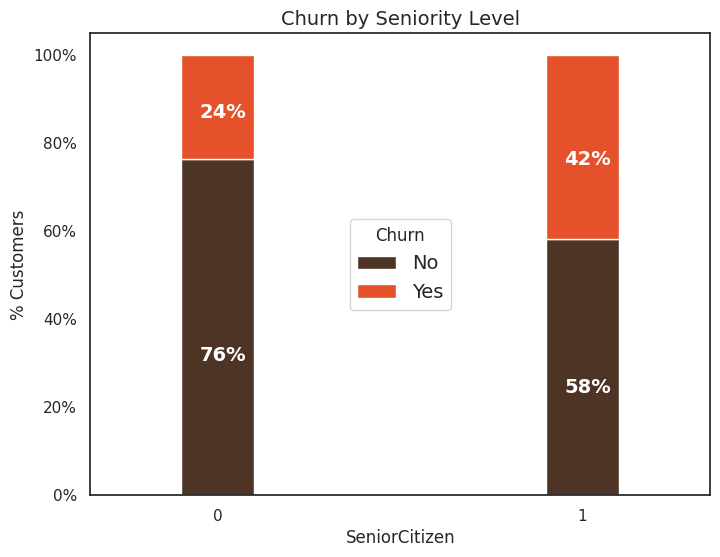

In [ ]:
# iii.) Churn by Seniority
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',  width = 0.2,  stacked = True,  rot = 0,  figsize = (8,6),  color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold',size =14)

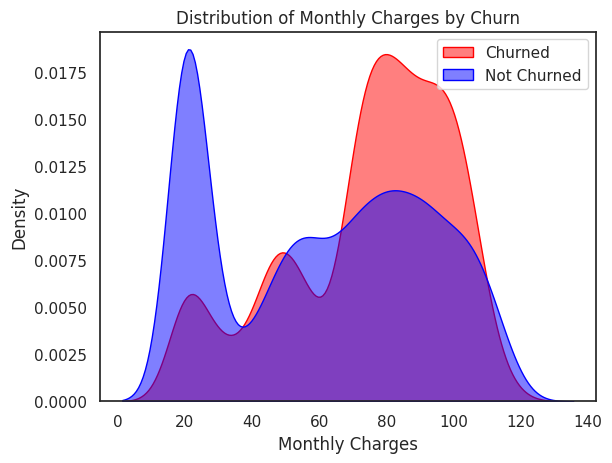

In [ ]:
# iv.) Churn by Monthly Charges


# Plot the distribution of monthly charges for churned customers
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes')],  fill=True, color='red', alpha=0.5, label='Churned')

# Plot the distribution of monthly charges for non-churned customers
sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No')],  fill=True, color='blue', alpha=0.5, label='Not Churned')

# Set the x-label and title
ax.set(xlabel='Monthly Charges', ylabel='Density')
ax.set_title('Distribution of Monthly Charges by Churn')

# Show the legend
ax.legend()

# Show the plot
plt.show()


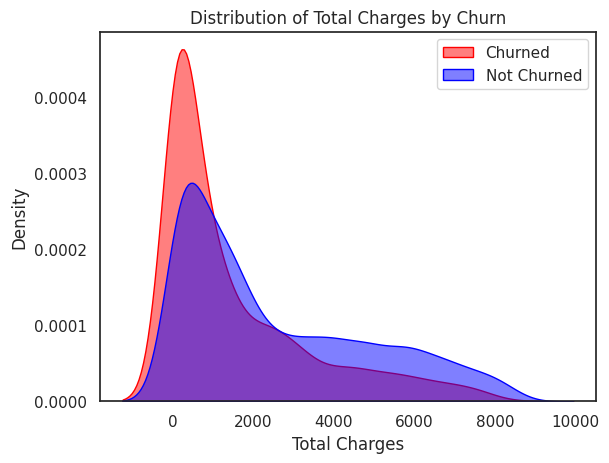

In [ ]:
# v.) Churn by Total Charges:
# Plot the distribution of total charges for churned customers
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes')],  fill=True, color='red', alpha=0.5, label='Churned')

# Plot the distribution of total charges for non-churned customers
sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No')],  fill=True, color='blue', alpha=0.5, label='Not Churned')

# Set the x-label and title
ax.set(xlabel='Total Charges', ylabel='Density')
ax.set_title('Distribution of Total Charges by Churn')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [20]:
# 1. Logistic Regression
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
x = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [22]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [23]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [24]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


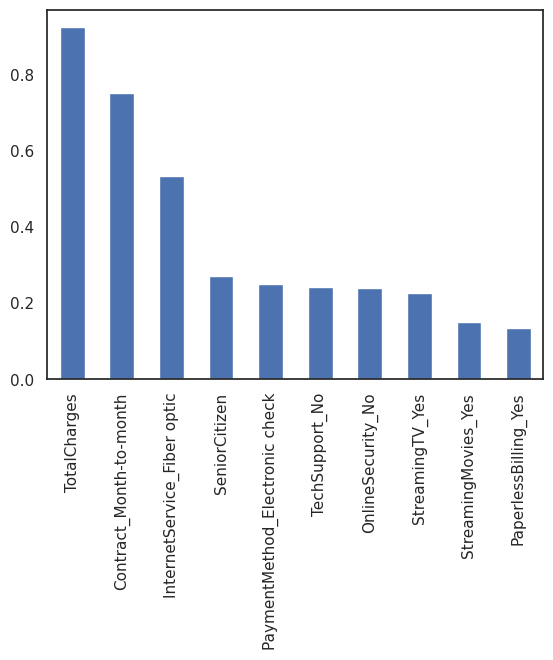

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


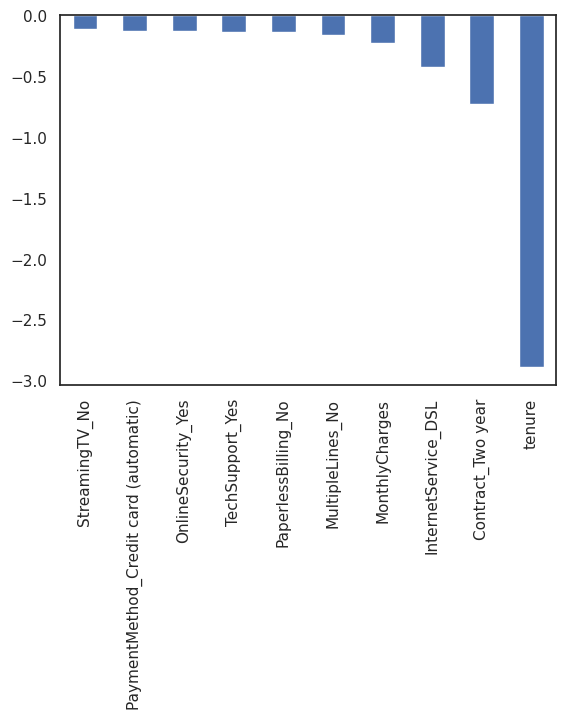

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [26]:
# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Create a Random Forest Classifier model
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_features="sqrt", max_leaf_nodes=30)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
prediction_test = model_rf.predict(X_test)

# Calculate and print the accuracy score
print(metrics.accuracy_score(y_test, prediction_test))


0.8088130774697939


<Axes: >

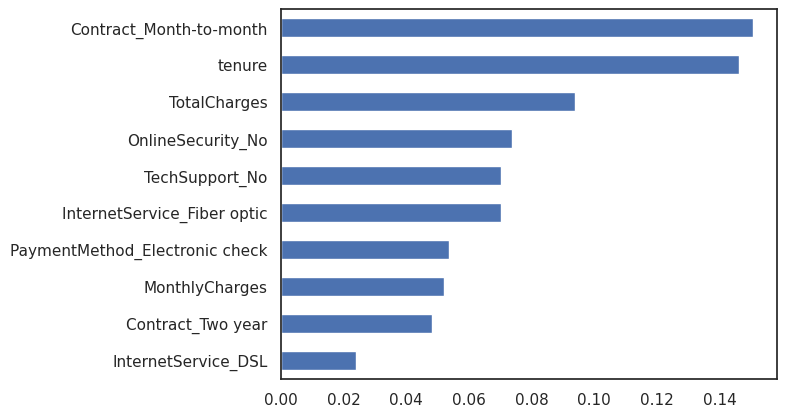

In [28]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [29]:
# 3. Support Vecor Machine (SVM)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [30]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [31]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[953  89]
 [164 201]]


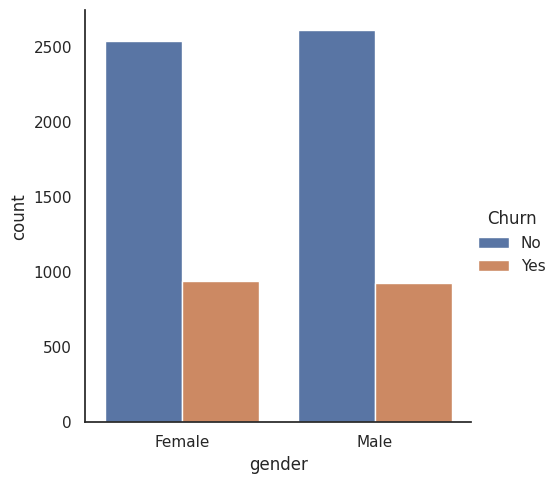

In [32]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

In [ ]:
# #Ada Boost
# # AdaBoost Algorithm
# from sklearn.ensemble import AdaBoostClassifier
# model = AdaBoostClassifier()
# # n_estimators = 50 (default value)
# # base_estimator = DecisionTreeClassifier (default value)
# model.fit(X_train,y_train)
# preds = model.predict(X_test)
# metrics.accuracy_score(y_test, preds)

0.8159203980099502

In [ ]:
# #XG Boost
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X_train, y_train)
# preds = model.predict(X_test)
# metrics.accuracy_score(y_test, preds)

0.8095238095238095